#### Imports and Data Download

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data from Home Mortgage Disclosure Act (HMDA) dataset for 2017, 

Downloadable at https://www.consumerfinance.gov/data-research/hmda/ -> select 
'Download 2007-2017 data' -> geographic area should be 'nationwide' and records
should include 'mortgages for first lien, owner-occupied, 1-4 family homes -> 
choose csv file for 2017

In [8]:
# set working directory for CSV file here:
wd = '/Users/markoshea/Desktop/Working Directories/Datasets/HMDA2017/'

In [65]:
hmda2017_raw = pd.read_csv(wd + 'hmda_2017_nationwide.csv', low_memory=False)

#### Data Cleaning

In [ ]:
# check count of NaNs per column
hmda2017_raw.isna().sum()

as_of_year                              0
respondent_id                           0
agency_name                             0
agency_abbr                             0
agency_code                             0
                                   ...   
hud_median_family_income             9820
tract_to_msamd_income                9820
number_of_owner_occupied_units       9833
number_of_1_to_4_family_units        9833
application_date_indicator        5986659
Length: 78, dtype: int64

In [71]:
# apply filter to remove validity and quality edit failures
hmda2017 = hmda2017_raw[~hmda2017_raw['edit_status'].isin([5, 6, 7])]
hmda2017

,as_of_year,respondent_id,agency_name,agency_abbr,agency_code,loan_type_name,loan_type,property_type_name,property_type,loan_purpose_name,...,edit_status_name,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
0,2017,0000068601,National Credit Union Administration,NCUA,5,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,4272.0,2.790000,55800.0,99.970001,1609.0,2271.0,NaN
1,2017,0000063194,National Credit Union Administration,NCUA,5,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,5451.0,10.790000,56800.0,128.639999,1601.0,1814.0,NaN
2,2017,0000451965,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,3372.0,33.189999,97400.0,141.740005,592.0,1105.0,NaN
3,2017,41-1842999,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,12551.0,6.490000,89800.0,135.779999,3463.0,3782.0,NaN
4,2017,0000613307,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3755.0,62.639999,73700.0,132.720001,623.0,742.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986654,2017,0000143662,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3827.0,22.809999,59900.0,95.559998,943.0,2025.0,NaN
5986655,2017,75-2921540,Department of Housing and Urban Development,HUD,7,Conventional,1,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,4488.0,18.110001,73700.0,225.089996,1397.0,1478.0,NaN
5986656,2017,7197000003,Department of Housing and Urban Development,HUD,7,FHA-insured,2,One-to-four family dwelling (other than manufa...,1,Refinancing,...,NaN,NaN,NaN,3412.0,26.290001,53700.0,88.519997,541.0,1856.0,NaN
5986657,2017,54-0259290,Consumer Financial Protection Bureau,CFPB,9,Conventional,1,One-to-four family dwelling (other than manufa...,1,Home purchase,...,NaN,NaN,NaN,7768.0,55.029999,107600.0,138.639999,1614.0,2245.0,NaN


### Data Analysis

In [67]:
#get only refinancing loans
first_lien = hmda2017[hmda2017['loan_purpose'] == 3]

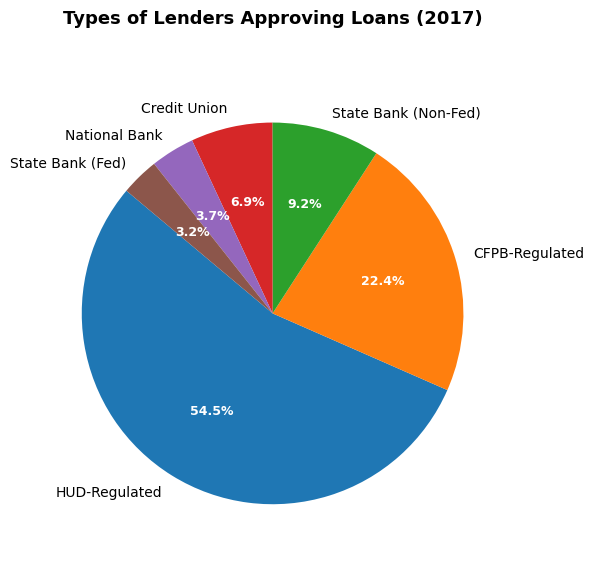

In [68]:
# visualize counts of the types of lenders approving loans

## get only approved loans
approved = hmda2017[hmda2017['action_taken'].isin([1, 2, 8])]

## get the counts of agencies approving loans
agencies_approving = approved["agency_code"].value_counts()

lender_type = {
    1: "National Bank",
    2: "State Bank (Fed)",
    3: "State Bank (Non-Fed)",
    5: "Credit Union",
    7: "HUD-Regulated",
    9: "CFPB-Regulated"
}

agencies_approving.index = agencies_approving.index.map(lender_type)
# CFPB regulated: think Non-bank mortgage companies (Quicken Loans, Rocket Mortgage, etc)
# or banks and credit unions for consumer protection compliance
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 11
})

fig, ax = plt.subplots(figsize=(6, 6))

pie_parts = ax.pie(
    agencies_approving,
    labels=agencies_approving.index,
    autopct="%1.1f%%",
    startangle=140
)

wedges = pie_parts[0]
texts = pie_parts[1]
autotexts = pie_parts[2]

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(9)
    autotext.set_weight("bold")

for text in texts:
    text.set_color("black")
    text.set_fontsize(10)

ax.set_title("Types of Lenders Approving Loans (2017)", fontsize=13, weight="bold", pad=20)
ax.axis("equal")

plt.tight_layout()
plt.show()

Mean loan amount (000's): 257.33
Standard deviation of loan amounts (000's): 459.16


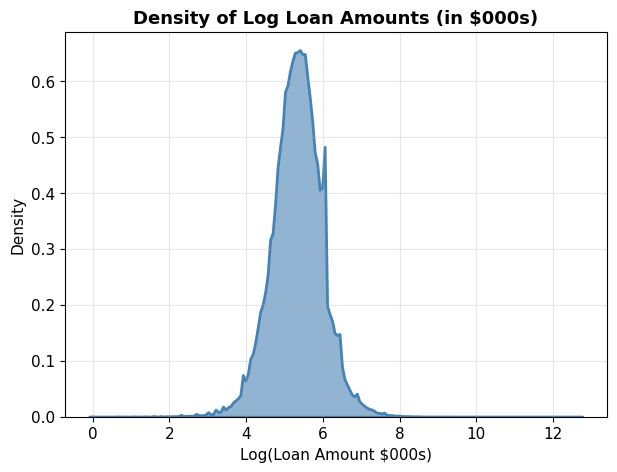

In [69]:
# visualize density of loan amounts
loan_amounts = hmda2017['loan_amount_000s'].dropna()
## use log scale to reduce skewness
log_loan_amounts = np.log(loan_amounts)

print(f"Mean loan amount (000's): {hmda2017['loan_amount_000s'].mean():.2f}")
print(f"Standard deviation of loan amounts (000's): {hmda2017['loan_amount_000s'].std():.2f}")

plt.figure(figsize=(7,5))
sns.kdeplot(log_loan_amounts, fill=True, color="steelblue", alpha=0.6, linewidth=2)
plt.title("Density of Log Loan Amounts (in $000s)", fontsize=13, weight="bold")
plt.xlabel("Log(Loan Amount $000s)")
plt.ylabel("Density")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# research idea: model that allows you to determine likelihood of loan approval 
# based on applicant characteristics 

# user input: 
## overseeing agency / lender type (toggle between all and specific)
## msa/md
## State
## County
## Census tract number (might not need)
## loan type
## property type
## loan purpose
## owner-occupancy
## ethnicity
## race
## sex
## gross annual income

# model could also include:
## total population in census tract
## minority population percentage in census tract
## median income (FFEIC) for census tract
## median family income as a fraction of MSA/MD median income
## Number of owner-occupied units in census tract
## Number of 1-4 family units in census tract

# other extensions:
## data from other years
## interest rate data

In [ ]:
# research idea:
# hold all user parameters fixed except one, and vary that one to see how it 
# affects likelihood of approval

## ex: does applicant gender have an affect on likelihood of approval? if not, we
## can remove it as an input parameter from the model